# Import needed libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR, SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import plot_tree

In [2]:
df = pd.read_csv('heart.csv')

# Data Cleansing

### converting the non-numeric data into nulls to be dropped

In [3]:
df['chol'] = pd.to_numeric(df['chol'],errors='coerce')
df.dropna(inplace=True,how='any')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 292 entries, 0 to 309
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       292 non-null    float64
 1   sex       292 non-null    float64
 2   cp        292 non-null    float64
 3   trestbps  292 non-null    float64
 4   chol      292 non-null    float64
 5   fbs       292 non-null    float64
 6   restecg   292 non-null    float64
 7   thalach   292 non-null    float64
 8   exang     292 non-null    int64  
 9   oldpeak   292 non-null    float64
 10  slope     292 non-null    int64  
 11  ca        292 non-null    float64
 12  thal      292 non-null    float64
 13  target    292 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 34.2 KB


### drop any duplicates

In [4]:
df.drop_duplicates(inplace=True)

df.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000
mean,54.428070,0.691228,0.961404,131.954386,246.729825,0.147368,0.519298,149.273684,0.326316,1.047719,1.389474,0.722807,2.319298,0.529825
std,9.048729,0.462799,1.038986,17.585446,52.115196,0.355096,0.521185,23.041348,0.469689,1.174091,0.621698,1.005446,0.604979,0.499988
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,276.000000,0.000000,1.000000,165.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### determine the test and the train data

In [5]:
x = df.drop('target',axis=1)
yTarget = df['target']

xtrain, xtest, ytrain, ytest = train_test_split(x, yTarget, test_size=0.2, random_state=42)

### reasure the data cleansing by removing any nulls or duplicates

In [6]:
xtrain_clean = xtrain.dropna(how='any')
xtrain_clean = xtrain_clean.drop_duplicates()

xtest_clean = xtest.dropna(how='any')
xtest_clean = xtest_clean.drop_duplicates()

### calculating the IQR's to remove any outliers

In [7]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

xtest_clean = xtest_clean.clip(lower=lower_bound, upper=upper_bound, axis=1)


df.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000
mean,54.428070,0.691228,0.961404,131.954386,246.729825,0.147368,0.519298,149.273684,0.326316,1.047719,1.389474,0.722807,2.319298,0.529825
std,9.048729,0.462799,1.038986,17.585446,52.115196,0.355096,0.521185,23.041348,0.469689,1.174091,0.621698,1.005446,0.604979,0.499988
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,276.000000,0.000000,1.000000,165.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Feature Selection

### calculating Z-score for each column except the target column to split the data based on its priority

In [8]:
numeric_cols = xtrain_clean.select_dtypes(include=['number']).columns
numeric_cols = [col for col in numeric_cols if col != 'target'] 
z_scores = xtrain_clean[numeric_cols].apply(lambda x: np.abs((x - x.mean()) / x.std()))
mean_z_scores = z_scores.mean().sort_values(ascending=False)

print("Z-scores for each column:")
print(mean_z_scores)

Z-scores for each column:
restecg     0.997190
exang       0.931039
slope       0.921129
sex         0.916777
thal        0.894054
cp          0.884907
ca          0.826986
age         0.826731
thalach     0.813026
chol        0.788981
trestbps    0.785764
oldpeak     0.781349
fbs         0.727683
dtype: float64


### splitting the data based on it's Z-score to high, mid, and low priority to drop the low priority

In [9]:
n_features = len(mean_z_scores)
high_priority = mean_z_scores[:n_features//3].index.tolist()
medium_priority = mean_z_scores[n_features//3 : 2*(n_features//3)].index.tolist()
low_priority = mean_z_scores[2*(n_features//3):].index.tolist()

print(high_priority)
print(medium_priority)
print(low_priority)
low_priority_to_drop = [col for col in low_priority if col in xtrain_clean.columns]
xtrain_selected = xtrain_clean.drop(low_priority_to_drop, axis=1)
xtest_selected = xtest_clean.drop(low_priority_to_drop, axis=1)

features = high_priority + medium_priority
print(features)

['restecg', 'exang', 'slope', 'sex']
['thal', 'cp', 'ca', 'age']
['thalach', 'chol', 'trestbps', 'oldpeak', 'fbs']
['restecg', 'exang', 'slope', 'sex', 'thal', 'cp', 'ca', 'age']


#                      Scalling Data

In [10]:
scaler = StandardScaler()

X_train_highmed= scaler.fit_transform(xtrain_selected)
X_test_highmed = scaler.transform(xtest_selected)

x_train_scaled = pd.DataFrame(X_train_highmed, columns=features, index=xtrain.index)
X_test_scaled = pd.DataFrame(X_test_highmed, columns=features, index=xtest.index)

# Model Training

## SVM model creation

In [11]:
SVM_model = SVC(kernel='poly')
SVM_model.fit(x_train_scaled, ytrain)

svm_score = SVM_model.score(X_test_scaled, ytest)
svm_pre = SVM_model.predict(X_test_scaled)
svm_accuracy = accuracy_score(ytest, svm_pre)
svm_CMatrix = confusion_matrix(ytest, svm_pre)
svm_classification_report = classification_report(ytest,svm_pre)

## KNN model creation

In [12]:
KNN_model = KNeighborsClassifier(n_neighbors=3)
KNN_model.fit(x_train_scaled, ytrain)

knn_score = KNN_model.score(X_test_scaled, ytest)
knn_pre = KNN_model.predict(X_test_scaled)
knn_accuracy = accuracy_score(ytest, knn_pre)
knn_CMatrix = confusion_matrix(ytest, knn_pre)
knn_classification_report = classification_report(ytest,knn_pre)

## Logistic Regression

In [13]:
log_model = LogisticRegression()
log_model.fit(x_train_scaled, ytrain)

LogisticRegression()

In [14]:
log_score = log_model.score(X_test_scaled, ytest)
log_pre = log_model.predict(X_test_scaled)
log_accuracy = accuracy_score(ytest, log_pre)
log_CMatrix = confusion_matrix(ytest, log_pre)
log_classification_report = classification_report(ytest, log_pre)

## Decision Tree

In [15]:
tree_model = DecisionTreeClassifier(random_state=21)
tree_model.fit(x_train_scaled, ytrain)

DecisionTreeClassifier(random_state=21)

In [16]:
tree_score = tree_model.score(X_test_scaled, ytest)
tree_pre = tree_model.predict(X_test_scaled)
tree_accuracy = accuracy_score(ytest, tree_pre)
tree_CMatrix = confusion_matrix(ytest, tree_pre)
tree_classification_report = classification_report(ytest, tree_pre)

# Plotting

## Setup the variables to show the figures

In [17]:
model_names = ["SVM", "KNN", "Logistic Regression", "Decision Tree"]
accuracies = [svm_accuracy, knn_accuracy, log_accuracy, tree_accuracy]
correlation_matrix = df.corr()

## Make the figure to display the decision tree

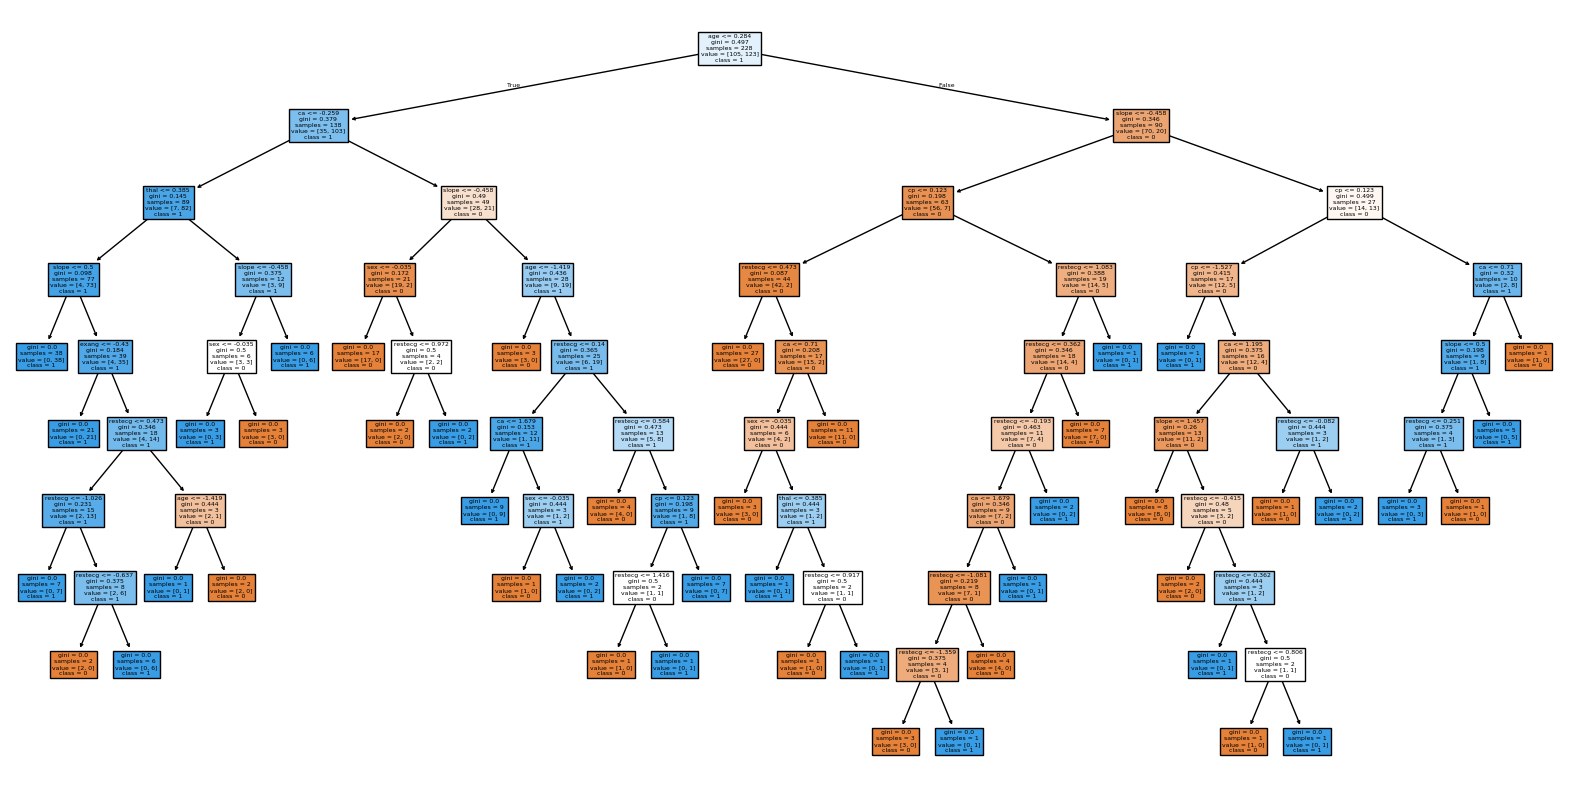

In [18]:
plt.figure(figsize=(20,10))
plot_tree(tree_model, feature_names=features, class_names=['0','1'], filled=True)
plt.show()

## Make the figure to show each model accuracy

(0.65, 0.9)

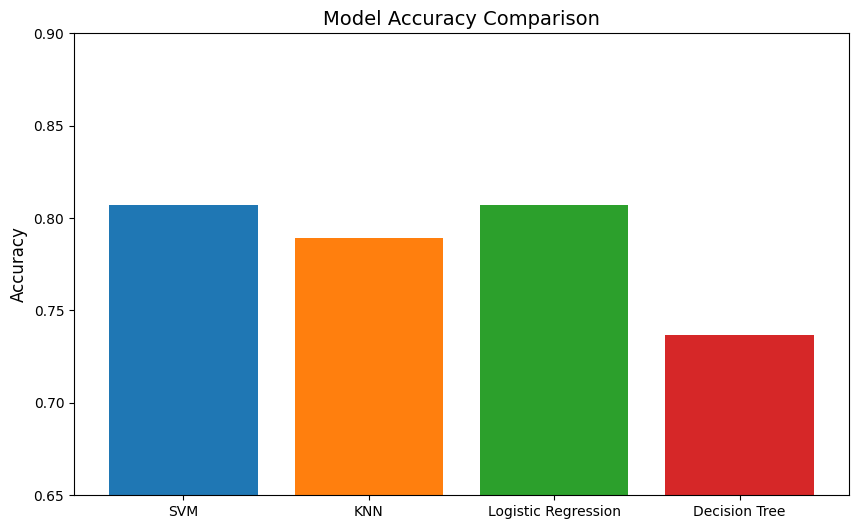

In [19]:
plt.figure(figsize=(10, 6))
bars = plt.bar(
    model_names, accuracies, color=["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]
)

plt.ylabel("Accuracy", fontsize=12)
plt.title("Model Accuracy Comparison", fontsize=14)
plt.ylim(0.65, 0.90)

C:\TMP\ipykernel_20288\4211544552.py:12: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


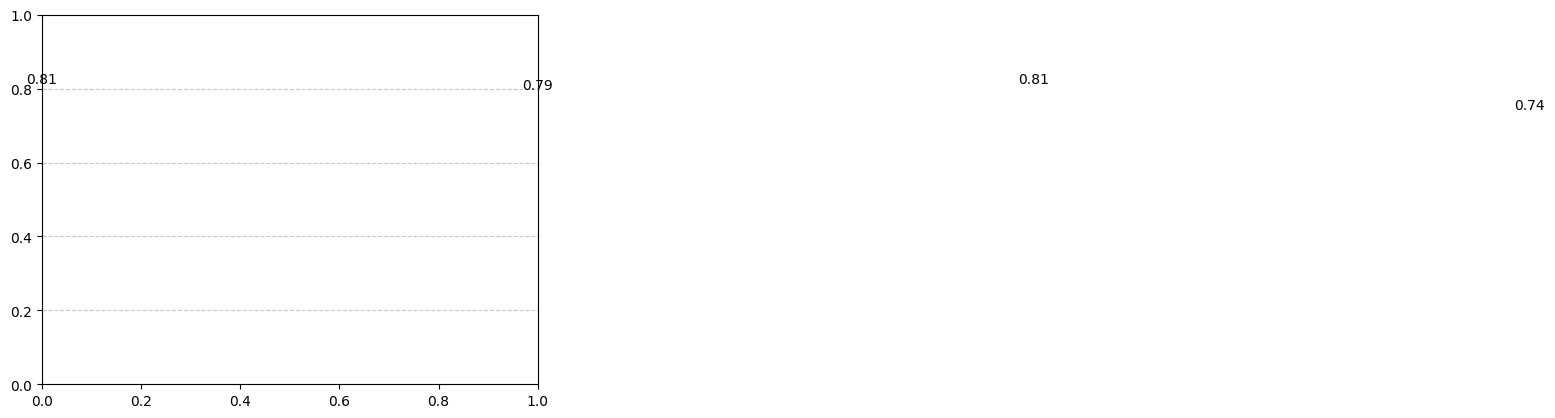

In [26]:
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height:.2f}",
        ha="center",
        va="bottom",
    )

plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

## Make the figure to show the heat map between the features and the target

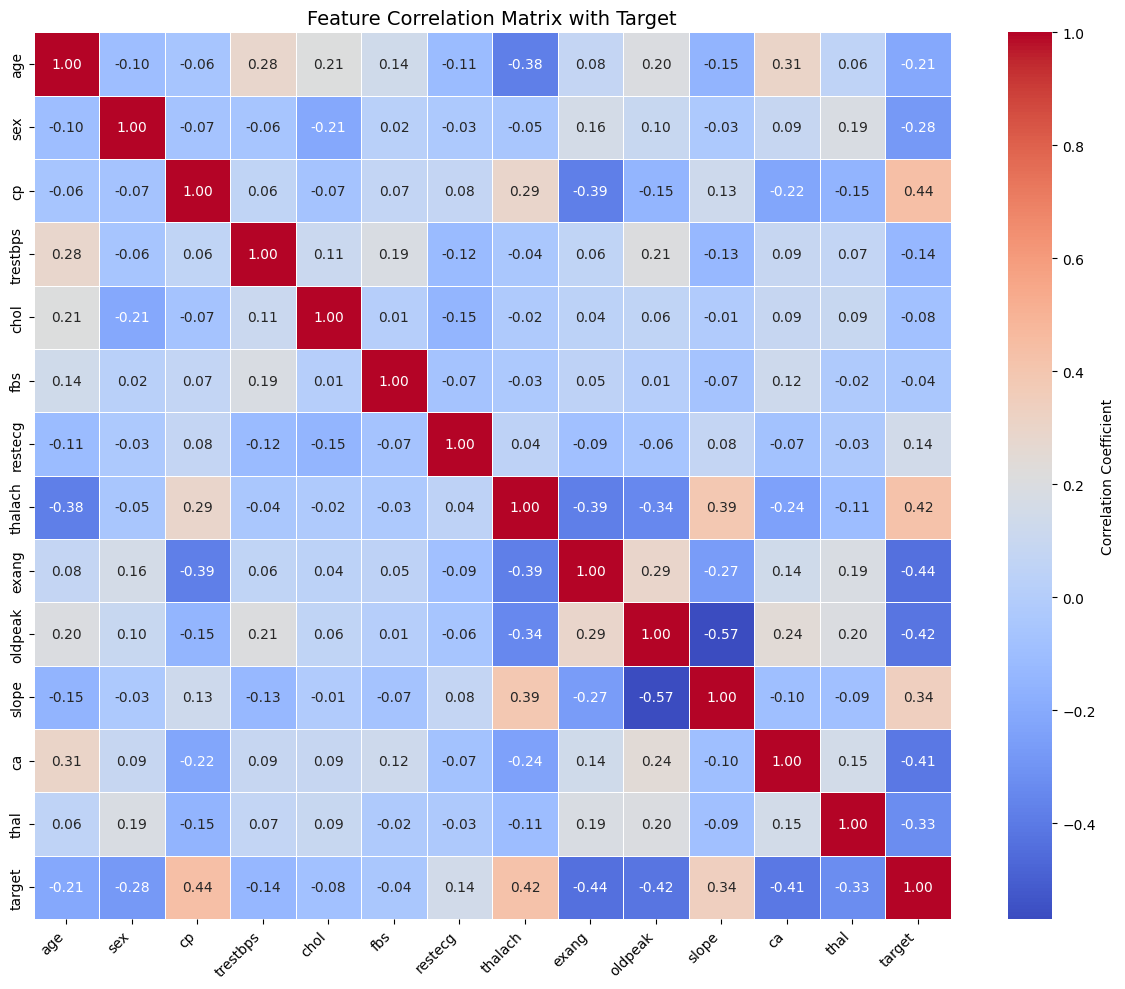

In [21]:
plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar_kws={"label": "Correlation Coefficient"},
    linewidths=0.5,
    annot_kws={"size": 10},
)

plt.title("Feature Correlation Matrix with Target", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

## Make the figure to show confusion matrices for the models

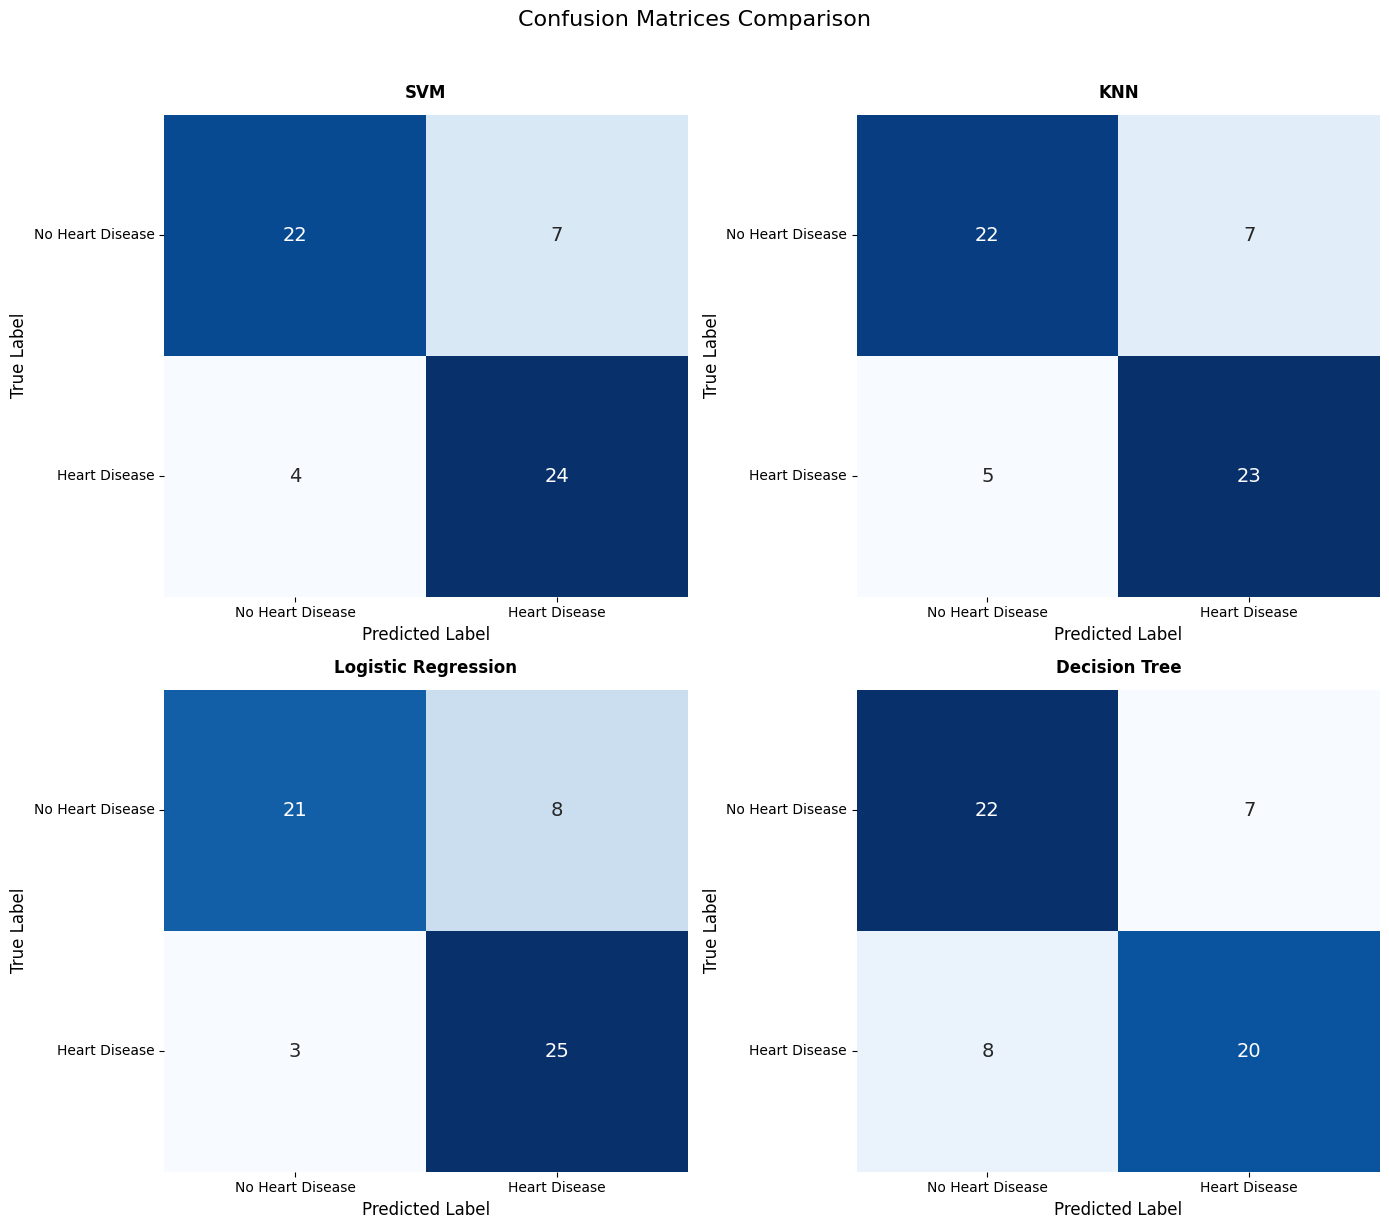

In [22]:
plt.figure(figsize=(14, 12))
plt.suptitle("Confusion Matrices Comparison", y=1.02, fontsize=16)

models = [("SVM", svm_CMatrix), ("KNN", knn_CMatrix), ("Logistic Regression", log_CMatrix), ("Decision Tree", tree_CMatrix)]

for idx, (model_name, matrix) in enumerate(models, 1):
    plt.subplot(2, 2, idx)
    sns.heatmap(
        matrix, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 14}
    )
    plt.title(f"{model_name}", fontweight="bold", pad=12)
    plt.xlabel("Predicted Label", fontsize=12)
    plt.ylabel("True Label", fontsize=12)
    plt.xticks([0.5, 1.5], ["No Heart Disease", "Heart Disease"], rotation=0)
    plt.yticks([0.5, 1.5], ["No Heart Disease", "Heart Disease"], rotation=0)

plt.tight_layout()
plt.show()